# Project: A/B testing for mobile game

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




> **Descriptions:** The data is about an A/B test with a mobile game called "Cookie Cats".



 **Dataset columns descriptions:**

- **userid**: A unique number that identifies each player.
- **version**: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
- **sum_gamerounds**: The number of game rounds played by the player during the first 14 days after install.
- **retention_1**: Did the player come back and play 1 day after installing?
- **retention_7**: Did the player come back and play 7 days after installing?


## **Question:**


*  Should we keep using the old version for cookie cats game or release the new version? 

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [2]:
# loading CSV files in to 3 Dataframes  //patients, treatments and adverse reaction//

df = pd.read_csv("cookie_cats.csv")

In [3]:
#checking 5 rows sample from Dataframes

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Assessing Data

In [4]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
#checking Dataframe shape (number of rows and columns)

df.shape

(90189, 5)

In [6]:
# checking for NaN values patients

df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [7]:
#checking for duplicated rows 

df.duplicated().sum()

0

In [8]:
# checking for duplicated with subset 

df.userid.duplicated().sum()

0

##  Cleaning Data


>**This data is quite clean**

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this dataset.


In [9]:
# Counting the number of players in each group.
df.groupby("version")["userid"].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

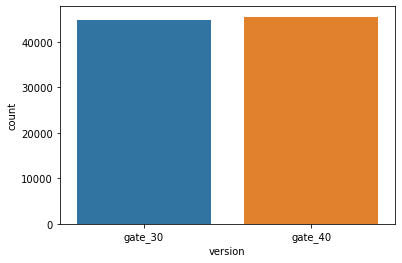

In [10]:
sns.countplot(x="version",data=df);

In [11]:
# Counting the retention_1 proptions in each group.
df.groupby("version")["retention_1"].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

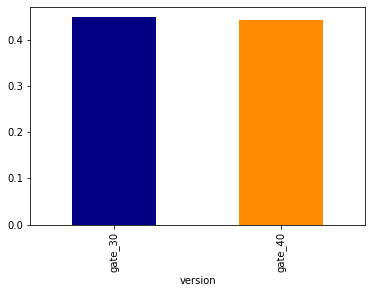

In [12]:
df.groupby("version")["retention_1"].mean().plot(kind="bar", color=[ "navy", "darkorange"]);

In [13]:
# Counting the retention_7 proptions in each group.
df.groupby("version")["retention_7"].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

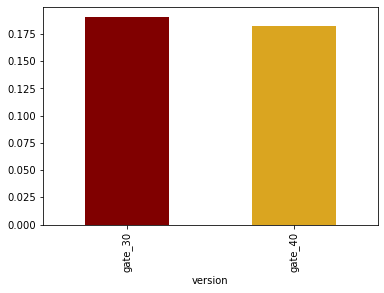

In [14]:
df.groupby("version")["retention_7"].mean().plot(kind="bar", color=[ "maroon", "goldenrod"]);

In [15]:
# Counting the sum_gamerounds means in each group.

df.groupby("version")["sum_gamerounds"].mean()

version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

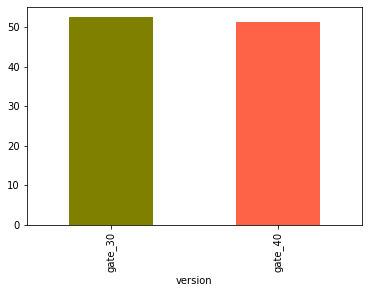

In [16]:
df.groupby("version")["sum_gamerounds"].mean().plot(kind="bar", color=[ "olive", "tomato"]);

<a id='eda'></a>
## A/B Test


> - **Now I'm going to make A/B test for 3 mertics:**
        1.sum_gamerounds.
        2.retention_1.
        3.retention_7.
> - **to check if we should keep using the old version of this game or we should release the new version.**

**Alpha level will be 0.05 so the results will be with 95% confidence.**

**I will use bonferroni correction because I'm going to check the results for 3 metrics so our real confidence interval lower and upper pounds are (0.00833333333 and 99.9916666667).**

### 1.sum_gamerounds test



>**$$H_0: M_{old} -  M_{New} >= 0 $$
$$H_1: M_{old} -  M_{New}  < 0 $$**

- H0 is the null hypothesis
- H1 is the Alternative hypothesis

In [17]:
obs_diff = df.query("version == 'gate_30'")["sum_gamerounds"].mean() - df.query("version == 'gate_40'")["sum_gamerounds"].mean() 
obs_diff

1.157488453953249

In [18]:
# bootstrap for difference in means

diff = []
for i in range (10000):
    sample = df.sample(df.shape[0], replace=True)
    old_mean = sample.query("version == 'gate_30'")["sum_gamerounds"].mean()
    new_mean = sample.query("version == 'gate_40'")["sum_gamerounds"].mean()
    diff.append(old_mean - new_mean)
diff = np.array(diff)

In [19]:
# create confidence interval lower and upper pounds

low, high = np.percentile(diff,0.00833333333), np.percentile(diff,99.9916666667)

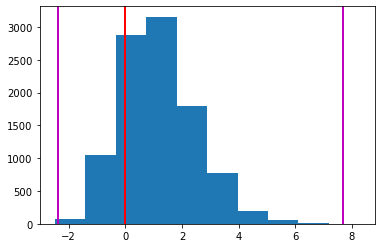

In [20]:
# make sampling destribution using bootstrap and mark confidence interval & observed difference

plt.hist(diff)
plt.axvline(low, lw=2, color="m")
plt.axvline(high, lw=2, color="m")
plt.axvline(0, lw=2, color="r");

### Result

> **The observed difference fall inside our confidence interval so we fail to reject the null hypothesis for sum_gamerounds.** 

> **Based on this data we have a statistical evidence that old version is making sum_gamerounds more than the new one so suggest keep using the old version.**

### 2. retention_1 test.



>**$$H_0: p_{old} -  p_{New} >= 0 $$
$$H_1: p_{old} -  p_{New}  < 0 $$**

- H0 is the null hypothesis
- H1 is the Alternative hypothesis

In [21]:
# make 2 dataframes for new and old versions

old = df.query("version == 'gate_30'")
new = df.query("version == 'gate_40'")

In [22]:
# number of old version users 
n_old = old.shape[0]
n_old

44700

In [23]:
# number of new version users 
n_new = new.shape[0]
n_new

45489

In [24]:
# retention_1 propotion for old version users 

p_old = old["retention_1"].mean()
p_old

0.4481879194630872

In [25]:
# retention_1 propotion for new version users 

p_new = new["retention_1"].mean()
p_new

0.44228274967574577

In [26]:
# calculate the observed difference in propotions 

obs_diff_prop = p_old - p_new
obs_diff_prop

0.005905169787341458

In [27]:
# making sampling distrbution from propotions difference using random binomial 

old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new 
p_diffs = old_converted_simulation - new_converted_simulation

In [28]:
# create confidence interval lower and upper pounds

low_1, high_1 = np.percentile(p_diffs,0.00833333333), np.percentile(p_diffs,99.9916666667)

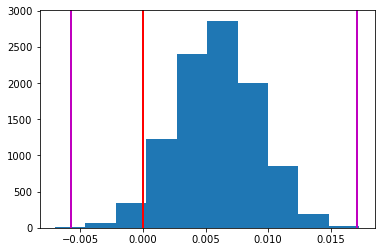

In [29]:
# drawing sampling distrbution and mark confidence interval & observed difference

plt.hist(p_diffs)
plt.axvline(low_1, lw=2, color="m")
plt.axvline(high_1, lw=2, color="m")
plt.axvline(0, lw=2, color="r");

### Result

> **The observed difference fall inside our confidence interval so we fail to reject the null hypothesis for retention_1.** 

> **Based on this data we have a statistical evidence that old version is making retention_1 more than the new one so suggest keep using the old version.**

### 3. retention_7 test


>**$$H_0: p_{old} -  p_{New} >= 0 $$
$$H_1: p_{old} -  p_{New}  < 0 $$**

- H0 is the null hypothesis
- H1 is the Alternative hypothesis

In [30]:
# retention_1 propotion for old version users 

p_old_7 = old["retention_7"].mean()
p_old_7

0.19020134228187918

In [31]:
# retention_1 propotion for new version users 

p_new_7 = new["retention_7"].mean()
p_new_7

0.18200004396667327

In [32]:
# making sampling distrbution from propotions difference using random binomial 

old_converted_simulation_7 = np.random.binomial(n_old, p_old_7, 10000)/n_old
new_converted_simulation_7 = np.random.binomial(n_new, p_new_7, 10000)/n_new 
p_diffs_7 = old_converted_simulation_7 - new_converted_simulation_7

In [33]:
# create confidence interval lower and upper pounds

low_7, high_7 = np.percentile(p_diffs_7,0.00833333333), np.percentile(p_diffs_7,99.9916666667)

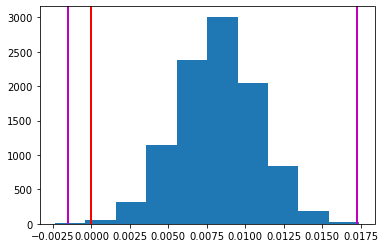

In [34]:
# drawing sampling distrbution and mark confidence interval & observed difference

plt.hist(p_diffs_7)
plt.axvline(low_7, lw=2, color="m")
plt.axvline(high_7, lw=2, color="m")
plt.axvline(0, lw=2, color="r");

### Result

> **The observed difference fall inside our confidence interval so we fail to reject the null hypothesis for retention_7.** 

> **Based on this data we have a statistical evidence that old version is making retention_7 more than the new one so suggest keep using the old version.**

<a id="conclusions"></a>
### Final Conclusion

> **The company should keep using the old version because we have statistical evidence with 95% confidence that the old version is better than the new one for all metrics that had been tested: (sum_gamerounds, retention_1 and retention_7).**